In [ ]:
# remove_digits = str.maketrans('0123456789', '//////////')
# 'ok bro3 je mange 656 caroot4E et toi pti69t gars4'.translate(remove_digits)

In [3]:
import pandas as pd

In [4]:
X_proc=pd.read_csv("../data/proc_data/X_proc_full_jsonlines.csv")

In [10]:
X_proc.head()

,item_id_movie,txt,is_movie,item_id_book
0,1.0,one film start clich remember well six year ol...,1,$$$
1,2.0,fun little movie hide back drawer movie play c...,1,$$$
2,3.0,second visit wabasha minnesota sequel rarely h...,1,$$$
3,4.0,extra movie actually extra movie quite fun tim...,1,$$$
4,5.0,best movie time let tell anyone like movie lit...,1,$$$


In [76]:
dfcb=pd.read_csv("../data/autre/books_count.csv").rename(columns={"item_id":"item_id_book","f0_":"count_rev_book"})
dfcm=pd.read_csv("../data/autre/movies_count.csv").rename(columns={"item_id":"item_id_movie","f0_":"count_rev_mov"})

In [77]:
dfcm["is_movie"]=1

In [78]:
df_count_rev=pd.concat([dfcb,dfcm], axis=0)
df_count_rev.head()

,item_id_book,count_rev_book,item_id_movie,count_rev_mov,is_movie
0,1329454.0,256.0,NaN,NaN,NaN
1,2096693.0,256.0,NaN,NaN,NaN
2,311976.0,256.0,NaN,NaN,NaN
3,21536784.0,256.0,NaN,NaN,NaN
4,1688642.0,256.0,NaN,NaN,NaN


In [79]:
df_count_rev["is_movie"]=df_count_rev.is_movie.fillna(0)
df_count_rev.fillna("N.A")

,item_id_book,count_rev_book,item_id_movie,count_rev_mov,is_movie
0,1329454.0,256.0,N.A,N.A,0.0
1,2096693.0,256.0,N.A,N.A,0.0
2,311976.0,256.0,N.A,N.A,0.0
3,21536784.0,256.0,N.A,N.A,0.0
4,1688642.0,256.0,N.A,N.A,0.0
...,...,...,...,...,...
52076,N.A,N.A,93132.0,39.0,1.0
52077,N.A,N.A,93432.0,39.0,1.0
52078,N.A,N.A,69387.0,39.0,1.0
52079,N.A,N.A,36426.0,39.0,1.0


In [80]:
df_count_rev.describe()

,item_id_book,count_rev_book,item_id_movie,count_rev_mov,is_movie
count,9.374000e+03,9374.000000,52081.000000,52081.000000,61455.000000
mean,1.790764e+07,566.207169,103849.662142,50.394731,0.847466
std,1.609355e+07,982.919554,57494.551793,150.441874,0.359541
min,1.150000e+02,164.000000,1.000000,1.000000,0.000000
25%,2.827314e+06,211.000000,62113.000000,5.000000,1.000000
50%,1.552455e+07,297.000000,119872.000000,13.000000,1.000000
75%,2.559235e+07,517.000000,151167.000000,36.000000,1.000000
max,5.704416e+07,21860.000000,182381.000000,5122.000000,1.000000


In [81]:
import seaborn as sns
import matplotlib.pyplot as plt 

(array([   0.,    0.,    0.,    0.,    0., 1862., 5063.]),
 array([  1.,   5.,  10.,  20.,  50., 100., 200., 500.]),
 <BarContainer object of 7 artists>)

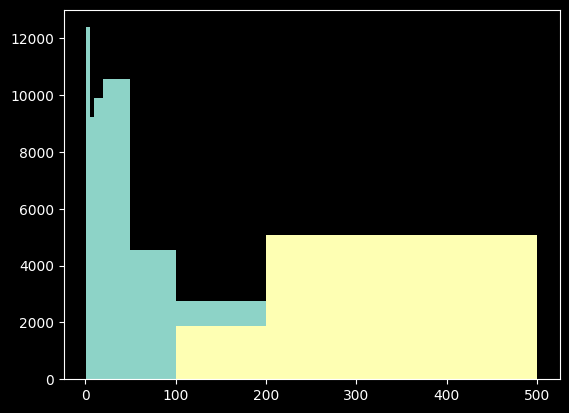

In [82]:
plt.hist(dfcm.count_rev_mov,bins=[1,5,10,20,50,100,200,500])
plt.hist(dfcb.count_rev_book,bins=[1,5,10,20,50,100,200,500])

In [96]:
dfcm[dfcm["count_rev_mov"]==2]

,item_id_movie,count_rev_mov,is_movie
15918,118038,2,1
15919,165403,2,1
15920,137763,2,1
15921,168492,2,1
15922,121650,2,1
...,...,...,...
19068,153204,2,1
19069,176445,2,1
19070,141672,2,1
19071,126130,2,1


In [105]:
X_proc.item_id_movie

0        1.0
1        2.0
2        3.0
3        4.0
4        5.0
        ... 
61450    $$$
61451    $$$
61452    $$$
61453    $$$
61454    $$$
Name: item_id_movie, Length: 61455, dtype: object